In [267]:
import datetime

import shutil
import requests

import time
import os
from netCDF4 import Dataset

import numpy as np
import matplotlib.pyplot as plt

from netCDFfunc.utility import to_img, cropping

In [2]:
most_recent = datetime.datetime.now()-datetime.timedelta(days=175)

In [3]:
most_recent

datetime.datetime(2022, 2, 20, 15, 29, 25, 325218)

In [4]:
j_day = most_recent.strftime('%j')
j_day = int(j_day)

In [5]:
def download_data(output_path, sepcific_date=None, start_date=None, end_date=None, dataset_names=None):
    ''' 
    start_date and end_date = Tuple (Year, Month, Day)
    
     1) start_date and end_date == None : most_recent
     2) start_date != None and end_date == None : start_date ~ most_recent
     3) start_date != None and end_date != None : start_date ~ end_date

    dataset_names = list of (AVHRR, CMC, DMI, GAMSSA, MUR25, MUR0.01, MWIR, MW, NAVO, OSPON, OSPO, OSTIA)
    '''
    most_recent = datetime.datetime.now()-datetime.timedelta(days=175)

    if start_date == None and end_date == None :    
        year = most_recent.strftime('%Y')
        date = most_recent.strftime('%Y%m%d')
        
        j_day = most_recent.strftime('%j')
        j_day = '%03d' % int(j_day)
        
    
    if dataset_names == None :
        dataset_names = ['AVHRR', 'CMC', 'DMI', 'GAMSSA', 'MUR25', 'MUR', 'MWIR', 'MW', 'NAVO', 'OSPON', 'OSPO', 'OSTIA']
    
    
    common_url = 'https://podaac-opendap.jpl.nasa.gov/opendap/hyrax/allData/ghrsst/data'

    for dataset_name in dataset_names :
        
        if dataset_name == 'AVHRR':
            file_name = f'{date}120000-NCEI-L4_GHRSST-SSTblend-AVHRR_OI-GLOB-v02.0-fv02.1.nc'
            url = f'{common_url}/GDS2/L4/GLOB/NCEI/AVHRR_OI/v2.1/{year}/{j_day}/{file_name}'
        
        elif dataset_name == 'CMC' :
            file_name = f'{date}120000-CMC-L4_GHRSST-SSTfnd-CMC0.1deg-GLOB-v02.0-fv03.0.nc'
            url = f'{common_url}/GDS2/L4/GLOB/CMC/CMC0.1deg/v3/{year}/{j_day}/{file_name}'
            
        elif dataset_name == 'DMI' :
            file_name = f'{date}000000-DMI-L4_GHRSST-SSTfnd-DMI_OI-GLOB-v02.0-fv01.0.nc'
            url = f'{common_url}/GDS2/L4/GLOB/DMI/DMI_OI/v1/{year}/{j_day}/{file_name}'
            
        elif dataset_name == 'GAMSSA' :
            file_name = f'{date}120000-ABOM-L4_GHRSST-SSTfnd-GAMSSA_28km-GLOB-v02.0-fv01.0.nc'
            url = f'{common_url}/GDS2/L4/GLOB/ABOM/GAMSSA/v1.0/{year}/{j_day}/{file_name}'
            
        elif dataset_name == 'MUR25' :
            file_name = f'{date}090000-JPL-L4_GHRSST-SSTfnd-MUR25-GLOB-v02.0-fv04.2.nc'
            url = f'{common_url}/GDS2/L4/GLOB/JPL/MUR25/v4.2/{year}/{j_day}/{file_name}'
            
        elif dataset_name == 'MUR' :
            file_name = f'{date}090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc'
            url = f'{common_url}/GDS2/L4/GLOB/JPL/MUR/v4.1/{year}/{j_day}/{file_name}'
            
        elif dataset_name == 'MWIR' :
            file_name = f'{date}120000-REMSS-L4_GHRSST-SSTfnd-MW_IR_OI-GLOB-v02.0-fv05.0.nc'
            url = f'{common_url}/GDS2/L4/GLOB/REMSS/mw_ir_OI/v5.0/{year}/{j_day}/{file_name}'
            
        elif dataset_name == 'MW' :
            file_name = f'{date}120000-REMSS-L4_GHRSST-SSTfnd-MW_OI-GLOB-v02.0-fv05.0.nc'
            url = f'{common_url}/GDS2/L4/GLOB/REMSS/mw_OI/v5.0/{year}/{j_day}/{file_name}'
            
        elif dataset_name == 'NAVO' :
            file_name = f'{date}000000-NAVO-L4_GHRSST-SST1m-K10_SST-GLOB-v02.0-fv01.0.nc'
            url = f'{common_url}/GDS2/L4/GLOB/NAVO/K10_SST/v1/{year}/{j_day}/{file_name}'
            
        elif dataset_name == 'OSPON' :
            file_name = f'{date}000000-OSPO-L4_GHRSST-SSTfnd-Geo_Polar_Blended_Night-GLOB-v02.0-fv01.0.nc'
            url = f'{common_url}/GDS2/L4/GLOB/OSPO/Geo_Polar_Blended_Night/v1/{year}/{j_day}/{file_name}'
            
        elif dataset_name == 'OSPO' :
            file_name = f'{date}000000-OSPO-L4_GHRSST-SSTfnd-Geo_Polar_Blended-GLOB-v02.0-fv01.0.nc'
            url = f'{common_url}/GDS2/L4/GLOB/OSPO/Geo_Polar_Blended/v1/{year}/{j_day}/{file_name}'
            
        elif dataset_name == 'OSTIA' :
            file_name = f'{date}-UKMO-L4HRfnd-GLOB-v01-fv02-OSTIA.nc.bz2'
            url = f'{common_url}/L4/GLOB/UKMO/OSTIA/{year}/{j_day}/{file_name}'
    
        response = requests.get(url, stream=True)
        
        if file_name.endswith('.bz2') : file_name = file_name.replace('.bz2', '')
        if not os.path.exists(os.path.join(output_path, dataset_name)) : os.mkdir(os.path.join(output_path, dataset_name))
            
        with open(os.path.join(output_path, dataset_name, file_name), 'wb') as out_file:
            print(f'{dataset_name} downloading...')
            shutil.copyfileobj(response.raw, out_file)
            
        del response

In [6]:
download_data('/Volumes/T7/download_data/')

AVHRR downloading...
CMC downloading...
DMI downloading...
GAMSSA downloading...
MUR25 downloading...
MUR downloading...
MWIR downloading...
MW downloading...
NAVO downloading...
OSPON downloading...
OSPO downloading...
OSTIA downloading...


In [272]:
def cropping(arr, region, grid_size):
    ratio = 0.25 / grid_size
    
    if region == 'rok':
        return arr[int(440 * ratio):int(572 * ratio), int(1160 * ratio):int(1320 * ratio)]
    if region == 'nw':
        return arr[280:624, 392:1136]
    if region == 'global':
        return arr

In [301]:
data_dir = f'/Volumes/T7/download_data/MWIR/'
data_file = os.listdir(data_dir)[0]
ds_in = Dataset(os.path.join(data_dir,data_file), 'r', format='NETCDF4')

In [134]:
dataset_names = ['AVHRR', 'CMC', 'DMI', 'GAMSSA', 'MUR25', 'MUR', 'MWIR', 'MW', 'NAVO', 'OSPON', 'OSPO', 'OSTIA']
data_dic = dict()
grid_dic = dict()
lat_dic = dict()
lon_dic = dict()

for dataset_name in dataset_names:
    
    data_dir = f'/Volumes/T7/download_data/{dataset_name}/'
    data_file = os.listdir(data_dir)[0]
    ds_in = Dataset(os.path.join(data_dir,data_file), 'r', format='NETCDF4')
    sst = ds_in.variables['analysed_sst'][:].data[0]
    try :
        grid = ds_in.geospatial_lat_resolution
    except :
        grid = 0.05
    lat = ds_in.variables['lat'][:].data
    lon = ds_in.variables['lon'][:].data
    
    data_dic[dataset_name] = sst
    grid_dic[dataset_name] = grid
    lat_dic[dataset_name] = lat
    lon_dic[dataset_name] = lon
    
    ds_in.close()

In [220]:
ds_mean = dict()
ds_mean['0.01'] = Dataset('/Volumes/T7/intermediate_output/resize_test/Resize_test_0220_0.01.nc', 'r', format='NETCDF4').variables['avgsst'][:].data[0]
ds_mean['0.05'] = Dataset('/Volumes/T7/intermediate_output/resize_test/Resize_test_0220_0.05.nc', 'r', format='NETCDF4').variables['avgsst'][:].data[0]
ds_mean['0.054'] = Dataset('/Volumes/T7/intermediate_output/resize_test/Resize_test_0220_0.054.nc', 'r', format='NETCDF4').variables['avgsst'][:].data[0]
ds_mean['0.081'] = Dataset('/Volumes/T7/intermediate_output/resize_test/Resize_test_0220_0.081.nc', 'r', format='NETCDF4').variables['avgsst'][:].data[0]
ds_mean['0.1'] = Dataset('/Volumes/T7/intermediate_output/resize_test/Resize_test_0220_0.1.nc', 'r', format='NETCDF4').variables['avgsst'][:].data[0]
ds_mean['0.25'] = Dataset('/Volumes/T7/new_data/processed_data/processed_data_1_rok_avg/30_years_dataset_1_rok_0220.nc', 'r', format='NETCDF4').variables['avgsst'][:].data[0]

In [321]:
name = 'NAVO' #()
print(grid_dic[name])
lat_dic[name]

0.1


array([ 90. ,  89.9,  89.8, ..., -89.8, -89.9, -90. ], dtype=float32)

In [238]:
np.min(ds_mean[str(grid_dic[ds])])

-999.0

In [245]:
0.875 / 0.05

17.5

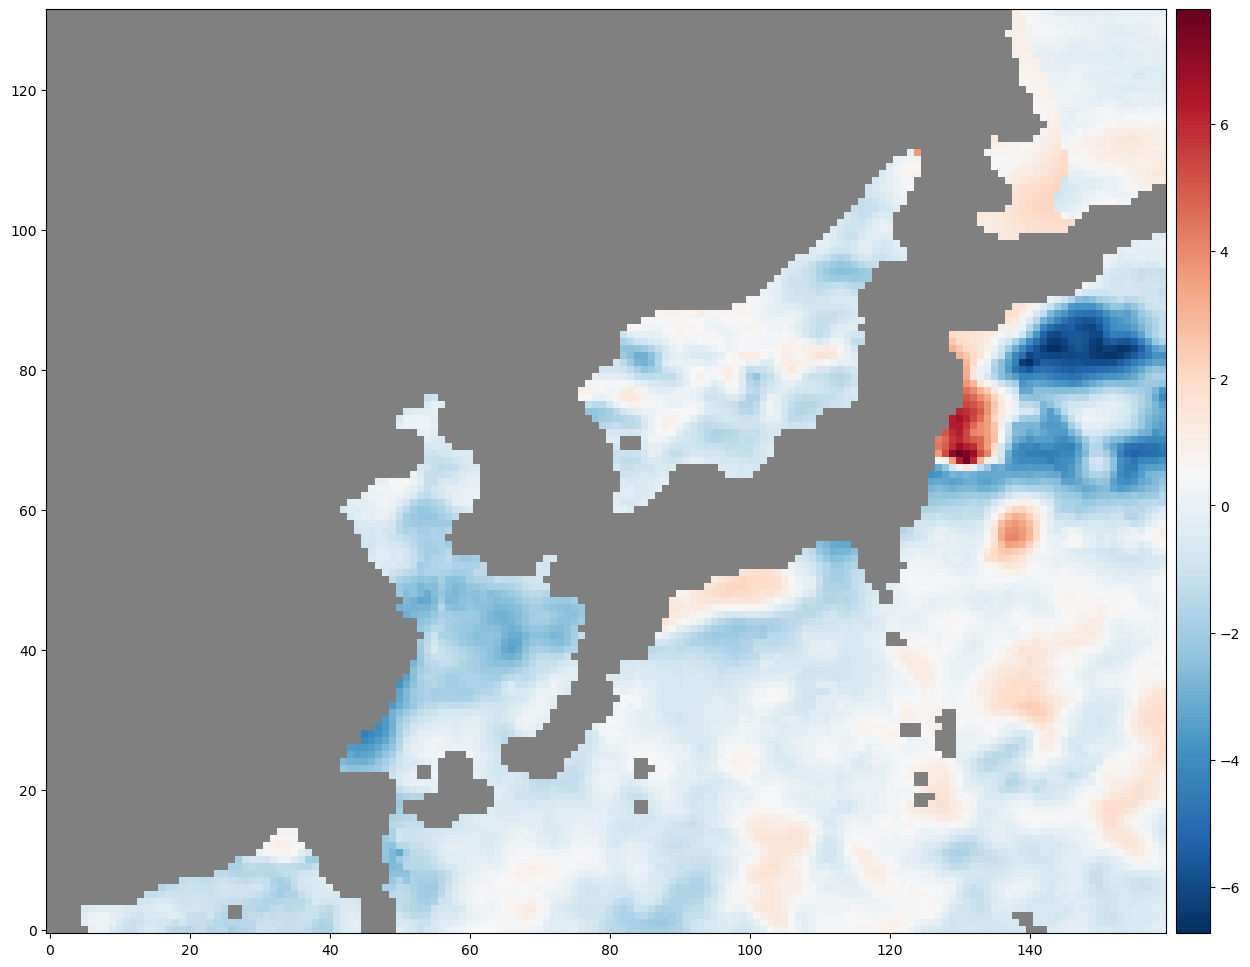

In [366]:
ds = 'MW'

data = data_dic[ds].copy()
if ds == 'NAVO':
    data = np.flip(data, axis=0)
    data = np.roll(data, -2, axis=1)
    data = np.roll(data, -2, axis=0)
if ds == 'DMI':
    data = np.roll(data, 18, axis=0)
np.place(data, data[:,:] <= -32767., np.nan)

grid_size = float(grid_dic[ds])
anomaly = ds_mean[str(grid_dic[ds])] - cropping(data - 273.15, 'rok', grid_size=grid_size)
np.place(anomaly, anomaly[:,:] < -100, np.nan)

to_img(anomaly, f'/Volumes/T7/intermediate_output/regrid_anomaly/{ds}({grid_size:.2f}).png', save_img=True, show_img=True, is_anomaly=True)

In [356]:
print(
    f'''
{ds}
{grid_dic[ds]}
min : {np.nanmin(anomaly)}
max : {np.nanmax(anomaly)}
mean : {np.nanmean(anomaly)}
median : {np.nanmedian(anomaly)}
    '''
)


OSTIA
0.05
min : -6.643327236175537
max : 8.214680671691895
mean : -0.2002459019422531
median : -0.15065574645996094
    


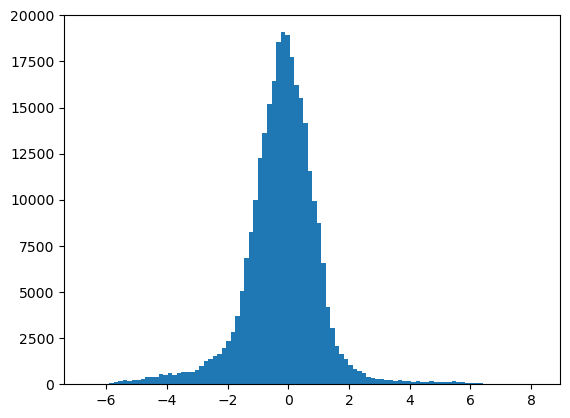

In [358]:
plt.hist(anomaly.flatten(), bins=100)
plt.show()